<a href="https://colab.research.google.com/github/woodstone10/data-intelligence-lab/blob/main/ping_delay_relationship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression with real data (Spirent LTE Ping delay test)

---
In this code, I use Tensorflow v1.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


## Data - csv (Spirent LTE ping delay test result)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('drive/My Drive/My Colab/dataset/L760DL LTE Data Ping Moving Re-Test.csv') #Spirent Moving Ping Test

In [ ]:
df.shape

(100, 102)

In [ ]:
df.head()

,TestResultFileId,TestSet,Configuration ID/IMEI,Device IMEI,SoftwareVersion,HardwareVersion,UserName,Email Address,Activation Code,DateTime,GPSLat,GPSLong,GPSValid,TaskId,TaskName,TaskComplete,ResultCode,Message,ResumeMessage,Expected,Actual,Pass,IPAddress,Description,MaximumRoundTripTime,MeanRoundTripTime,MinimumRoundTripTime,PacketLoss,PacketsSent,PacketsReceived,RFValue,RadioAccessTechnology,Project,TestSetTaskName,PostalCode,MediaServerName,MediaServerIPAddress,Manufacturer,Model,Carrier,...,Telephony Display Info Change Times,DataRadioAccessTechnologyChanges,DataRadioAccessTechnologyChangeTimes,WiFiSSIDChanges,WiFiBSSIDChanges,WiFiRSSIChanges,WiFiAvailableNetwork_Changes,LTE_PCIChanges,LTE_TimingAdvanceChanges,CDMA_ECIOChanges,EVDO_ECIOChanges,EVDO_SNRChanges,WCDMA_PSCChanges,WiFiFrequencyChanges,GPSSatellitePRNChanges,GPSSatelliteSNRChanges,EARFCNChanges,NetworkCountryChanges,NetworkOperatorChanges,LteTacChanges,LTEDownlinkFrequencyChanges,LTEUplinkFrequencyChanges,NR ARFCN Changes,NR PCI Changes,NR Band Changes,NR_ASU_LevelChanges,NR_CSI_RSRPChanges,NR_CSI_RSRQChanges,NR_CSI_SINRChanges,NR_DBMChanges,NR_LevelChanges,NR_SS_RSRPChanges,NR_SS_RSRQChanges,NR_SS_SINRChanges,Group Name,Cycle Number,Group Device Name,Group Device Role,Task Alarms,Result Details
0,09866F91-CA61-EB11-9133-56E1AD46896F,0_LTE_Ping_iPV4,125202111,75d39a9eb8b28174,NaN,NaN,NaN,NaN,NaN,44225.02802,0,0,False,1,PING_SUMMARY,complete,0,OK,NaN,90,43.72,1,172.58.44.191,NaN,127,43.72,28,0,25,25,-70,LTE,TRF TMUS Regression SEA 01252021,PING 25X 64 BYTES,NaN,lge-uswa01.metrico-datum.com,104.140.16.242,unknown,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://lg-01.umetrix.com/ResultFile.aspx?id=0...
1,0A866F91-CA61-EB11-9133-56E1AD46896F,0_LTE_Ping_iPV4,125202111,75d39a9eb8b28174,NaN,NaN,NaN,NaN,NaN,44225.02811,0,0,False,1,PING_SUMMARY,complete,0,OK,NaN,90,45.52,1,172.58.44.191,NaN,180,45.52,29,0,25,25,-70,LTE,TRF TMUS Regression SEA 01252021,PING 25X 64 BYTES,NaN,lge-uswa01.metrico-datum.com,104.140.16.242,unknown,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://lg-01.umetrix.com/ResultFile.aspx?id=0...
2,67E30C9A-CA61-EB11-9133-56E1AD46896F,0_LTE_Ping_iPV4,125202111,75d39a9eb8b28174,NaN,NaN,NaN,NaN,NaN,44225.02819,0,0,False,1,PING_SUMMARY,complete,0,OK,NaN,90,42.64,1,172.58.44.191,NaN,117,42.64,29,0,25,25,-70,LTE,TRF TMUS Regression SEA 01252021,PING 25X 64 BYTES,NaN,lge-uswa01.metrico-datum.com,104.140.16.242,unknown,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://lg-01.umetrix.com/ResultFile.aspx?id=6...
3,E1266DA1-CA61-EB11-9133-56E1AD46896F,0_LTE_Ping_iPV4,125202111,75d39a9eb8b28174,NaN,NaN,NaN,NaN,NaN,44225.02842,0,0,False,1,PING_SUMMARY,complete,0,OK,NaN,90,42.72,1,172.58.44.191,NaN,120,42.72,29,0,25,25,-70,LTE,TRF TMUS Regression SEA 01252021,PING 25X 64 BYTES,NaN,lge-uswa01.metrico-datum.com,104.140.16.242,unknown,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://lg-01.umetrix.com/ResultFile.aspx?id=E...
4,7F0BC0A7-CA61-EB11-9133-56E1AD46896F,0_LTE_Ping_iPV4,125202111,75d39a9eb8b28174,NaN,NaN,NaN,NaN,NaN,44225.02851,0,0,False,1,PING_SUMMARY,complete,0,OK,NaN,90,43.96,1,172.58.44.191,NaN,123,43.96,35,0,25,25,-70,LTE,TRF TMUS Regression SEA 01252021,PING 25X 64 BYTES,NaN,lge-uswa01.metrico-datum.com,104.140.16.242,unknown,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://lg-01.umetrix.com/ResultFile.aspx?id=7..

## Relationship between Mean value and Maximum value

In [ ]:
x = df[['MeanRoundTripTime']] #.dropna() # dependant var
y = df[['MaximumRoundTripTime']] #.dropna() # independant var

In [ ]:
x

,MeanRoundTripTime
0,43.72
1,45.52
2,42.64
3,42.72
4,43.96
...,...
95,54.48
96,64.56
97,59.88
98,53.60


In [ ]:
y

,MaximumRoundTripTime
0,127
1,180
2,117
3,120
4,123
...,...
95,375
96,560
97,445
98,365


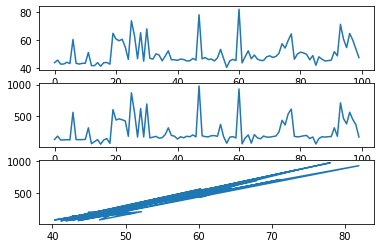

In [ ]:
plt.subplot(3,1,1)
plt.plot(x)
plt.subplot(3,1,2)
plt.plot(y)
plt.subplot(3,1,3)
plt.plot(x, y)
plt.show()

## Model

In [ ]:
W = tf.Variable(tf.random_uniform([1],-100,100)) # weight
b = tf.Variable(tf.random_uniform([1],-100,100)) # bias
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
H = W * X + b # Linear Regression
cost = tf.reduce_mean(tf.square(H - Y)) # cost/loss
a = tf.Variable(0.0001)
optimizer = tf.train.GradientDescentOptimizer(a) # Gradient Descent
train = optimizer.minimize(cost)
init = tf.global_variables_initializer()
sess = tf.Session() #Session
sess.run(init)

In [ ]:
count = []
error = []
for i in range(1000001):
    sess.run(train, feed_dict={X:x, Y:y})
    if i%100 == 0:
        count.append(i)
        error.append(sess.run(cost, feed_dict={X:x, Y:y}))
        print(i, sess.run(cost, feed_dict={X:x, Y:y}), sess.run(W), sess.run(b))

Streaming output truncated to the last 5000 lines.
500100 1684.4652 [21.75721] [-834.6984]
500200 1684.3716 [21.757805] [-834.72894]
500300 1684.2788 [21.758402] [-834.75946]
500400 1684.1854 [21.758997] [-834.79]
500500 1684.0928 [21.759592] [-834.8205]
500600 1683.9999 [21.760187] [-834.851]
500700 1683.9059 [21.760782] [-834.88153]
500800 1683.8142 [21.761377] [-834.91205]
500900 1683.7212 [21.761972] [-834.94257]
501000 1683.6283 [21.762568] [-834.9731]
501100 1683.5356 [21.763163] [-835.0036]
501200 1683.4435 [21.763758] [-835.0341]
501300 1683.3506 [21.764353] [-835.06464]
501400 1683.2582 [21.764948] [-835.09515]
501500 1683.1652 [21.765545] [-835.1257]
501600 1683.0728 [21.76614] [-835.1562]
501700 1682.9806 [21.766735] [-835.1867]
501800 1682.8878 [21.76733] [-835.2172]
501900 1682.7961 [21.767925] [-835.24774]
502000 1682.7036 [21.76852] [-835.27826]
502100 1682.6115 [21.769115] [-835.3088]
502200 1682.519 [21.76971] [-835.3393]
502300 1682.4272 [21.770306] [-835.3698]
502400

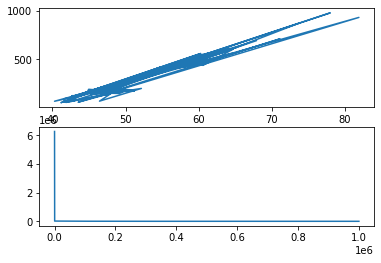

In [ ]:
plt.subplot(2,1,1)
plt.plot(x, y)
plt.subplot(2,1,2)
plt.plot(count, error)
plt.show()

## Prediction

In [ ]:
print("40:",sess.run(H, feed_dict={X:40}))
print("50:",sess.run(H, feed_dict={X:50}))
print("60:",sess.run(H, feed_dict={X:60}))

40: [24.10492]
50: [251.86932]
60: [479.63373]
